**Bibliotecas**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

**Bases**

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/Tyra02/IA/main/titanic_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Tyra02/IA/main/titanic_test.csv')
testClass = pd.read_csv('https://raw.githubusercontent.com/Tyra02/IA/main/titanic_gender_submission.csv')

**Tratando as bases**

In [3]:
X_train = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X_train = pd.get_dummies(X_train, columns=['Sex', 'Embarked'])
X_train['Age'].fillna(X_train['Age'].mean(), inplace=True)
Y_train = train['Survived']

X_test = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X_test = pd.get_dummies(X_test, columns=['Sex', 'Embarked'])
X_test['Age'].fillna(X_test['Age'].mean(), inplace=True)
X_test['Fare'].fillna(X_test['Fare'].mean(), inplace=True)
Y_test = testClass['Survived']

In [4]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,0,1
888,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,26.000000,0,0,30.0000,0,1,1,0,0


In [5]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.50000,0,0,7.8292,0,1,0,1,0
1,3,47.00000,1,0,7.0000,1,0,0,0,1
2,2,62.00000,0,0,9.6875,0,1,0,1,0
3,3,27.00000,0,0,8.6625,0,1,0,0,1
4,3,22.00000,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,0,1,0,0,1
414,1,39.00000,0,0,108.9000,1,0,1,0,0
415,3,38.50000,0,0,7.2500,0,1,0,0,1
416,3,30.27259,0,0,8.0500,0,1,0,0,1


**Treinando modelo**

In [6]:
boosting = XGBClassifier(n_estimators=100, random_state=123)
boosting.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

**Prevendo e mostrando resultados**

In [7]:
Y_pred = boosting.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [8]:
Y_test

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

<Axes: >

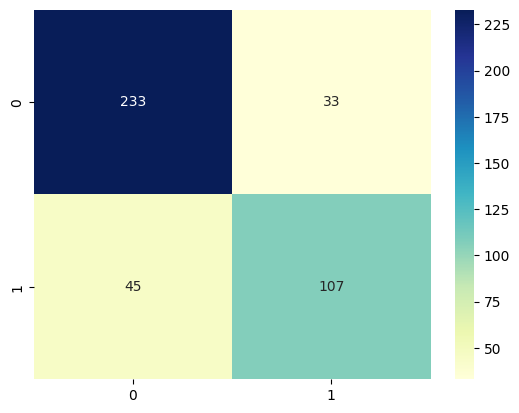

In [9]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)
cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [10]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       266
           1       0.76      0.70      0.73       152

    accuracy                           0.81       418
   macro avg       0.80      0.79      0.79       418
weighted avg       0.81      0.81      0.81       418

